In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('GoodReads_100k_books.csv')
df.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


$\begin{equation}
\text Weighted Rating (\bf WR) = \left({{\bf v} \over {\bf v} + {\bf m}} \cdot R\right) + \left({{\bf m} \over {\bf v} + {\bf m}} \cdot C\right)
\end{equation}$

In the above equation,

v is the number of votes for the movie;

m is the minimum votes required to be listed in the chart;

R is the average rating of the movie;

C is the mean vote across the whole report.

<AxesSubplot:xlabel='totalratings'>

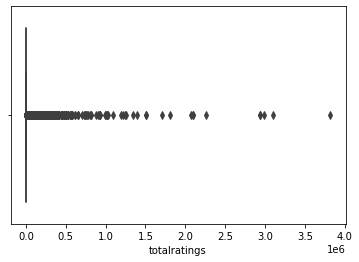

In [13]:
sns.boxplot(data=df, x='totalratings')

In [14]:
q1 = df['totalratings'].quantile(.25)
q3 = df['totalratings'].quantile(.9)

In [15]:
m = round(df['totalratings'].mean())
print(m)
df[df['totalratings'] >= m].shape

2991


(10488, 13)

In [16]:
C = df['rating'].mean()
v = df['totalratings']
R = df['rating']
df['weighted_rating'] = (v / (v + m) * R) + (m / (v + m) * C)

In [17]:
df.columns

Index(['author', 'bookformat', 'desc', 'genre', 'img', 'isbn', 'isbn13',
       'link', 'pages', 'rating', 'reviews', 'title', 'totalratings',
       'weighted_rating'],
      dtype='object')

In [18]:
df.sort_values(by='weighted_rating', ascending=False, inplace=True)

In [25]:
df['weighted_rating'].quantile(.75)

3.850659082865608

In [40]:
df[df['weighted_rating'] >= 4].to_csv('top_weighted_rating_gt_4.csv', index=False)

In [19]:
df.to_csv('top_weighted_rating_100k_books.csv', index=False)

In [18]:
df.head(2000)[['author', 'genre', 'title', 'totalratings', 'rating']].reset_index(drop=True).to_csv('2000_top_book.csv', index=False)

(array([1.0000e+00, 0.0000e+00, 9.0000e+00, 7.1000e+01, 5.5200e+02,
        1.5849e+04, 7.9630e+04, 3.3320e+03, 5.2500e+02, 3.1000e+01]),
 array([2.57778681, 2.7851919 , 2.992597  , 3.2000021 , 3.40740719,
        3.61481229, 3.82221739, 4.02962249, 4.23702758, 4.44443268,
        4.65183778]),
 <BarContainer object of 10 artists>)

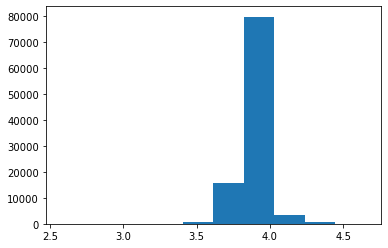

In [31]:
plt.hist(df['weighted_rating'])